# Встановлення необхідних бібліотек

In [4]:
from numpy.random import seed
#!pip install tensorflow==1.14
import cv2
from sklearn.model_selection import train_test_split
import os
import numpy as np
import skimage
from skimage.transform import resize
import csv
import itertools
from tqdm import tqdm
from glob import glob
from matplotlib import pyplot as plt
from numpy import floor
import random
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#from keras.layers import Conv2D, Dense, Dropout, Flatten
#from keras.models import Sequential
#from keras.preprocessing.image import ImageDataGenerator

In [31]:
%pip install mediapipe --user
import mediapipe as mp

Note: you may need to restart the kernel to use updated packages.


# **Підготовка даних**

Завантажуємо зображення з каталогу, шлях до якого передано у вхідних даних.

In [5]:
def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels):
        print(label," is ready to load")
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

Завантаження тренувальних даних

In [7]:
import keras

train_dir = "./input/asl_alphabet/asl_alphabet_train/asl_alphabet_train"

uniq_labels = sorted(os.listdir(train_dir))

images, labels = load_images(directory = train_dir)
print("Data has been loaded")



A  is ready to load
B  is ready to load
C  is ready to load
D  is ready to load
E  is ready to load
F  is ready to load
G  is ready to load
H  is ready to load
I  is ready to load
J  is ready to load
K  is ready to load
L  is ready to load
M  is ready to load
N  is ready to load
O  is ready to load
P  is ready to load
Q  is ready to load
R  is ready to load
S  is ready to load
T  is ready to load
U  is ready to load
V  is ready to load
W  is ready to load
X  is ready to load
Y  is ready to load
Z  is ready to load
del  is ready to load
nothing  is ready to load
space  is ready to load
Data has been loaded


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, stratify = labels)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of symbols: ", n)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)



Total number of symbols:  29
Number of training images:  69600
Number of testing images:  17400


Виведення прикладів тренувальних зображень

In [9]:
def print_images(image_list):
    n = int(len(image_list) / len(uniq_labels))
    cols = 8
    rows = 4
    fig = plt.figure(figsize = (24, 12))

    for i in range(len(uniq_labels)):
        ax = plt.subplot(rows, cols, i + 1)
        plt.imshow(image_list[int(n*i)])
        plt.title(uniq_labels[i])
        ax.title.set_fontsize(20)
        ax.axis('off')
    plt.show()

Training Images: 


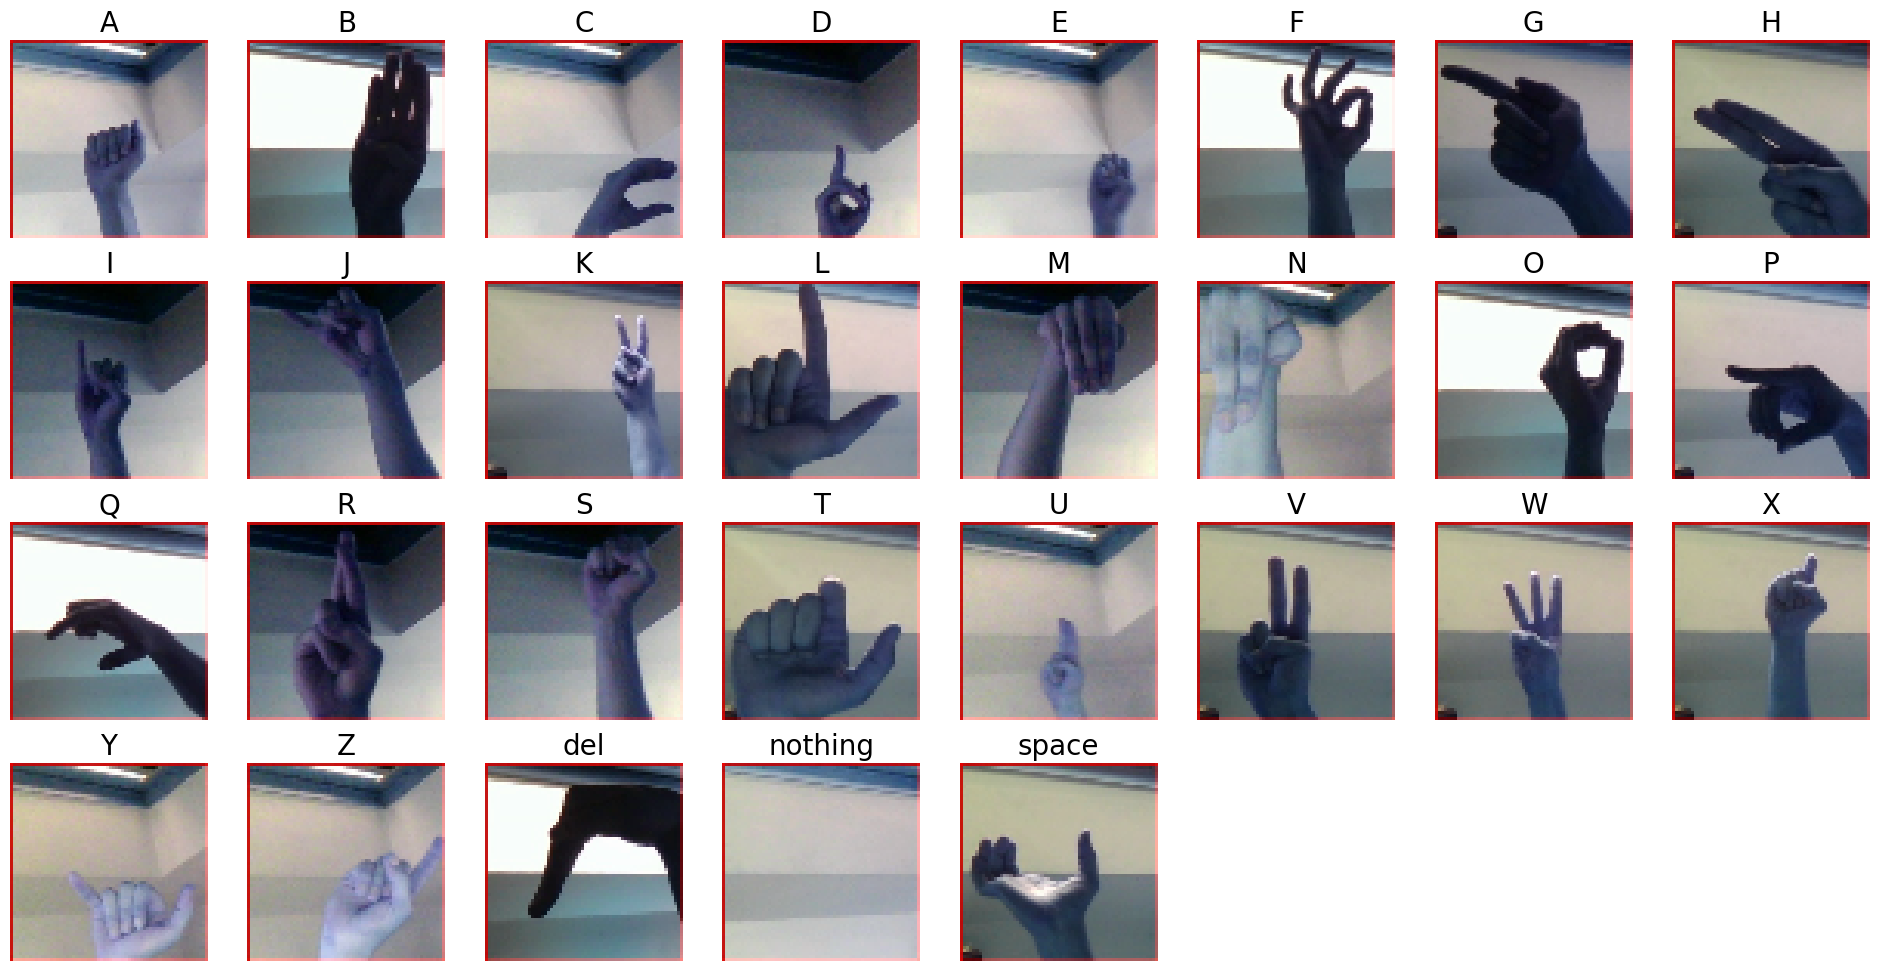

In [10]:
y_train_in = y_train.argsort()
y_train = y_train[y_train_in]
X_train = X_train[y_train_in]

print("Training Images: ")
print_images(image_list = X_train)

Testing images: 


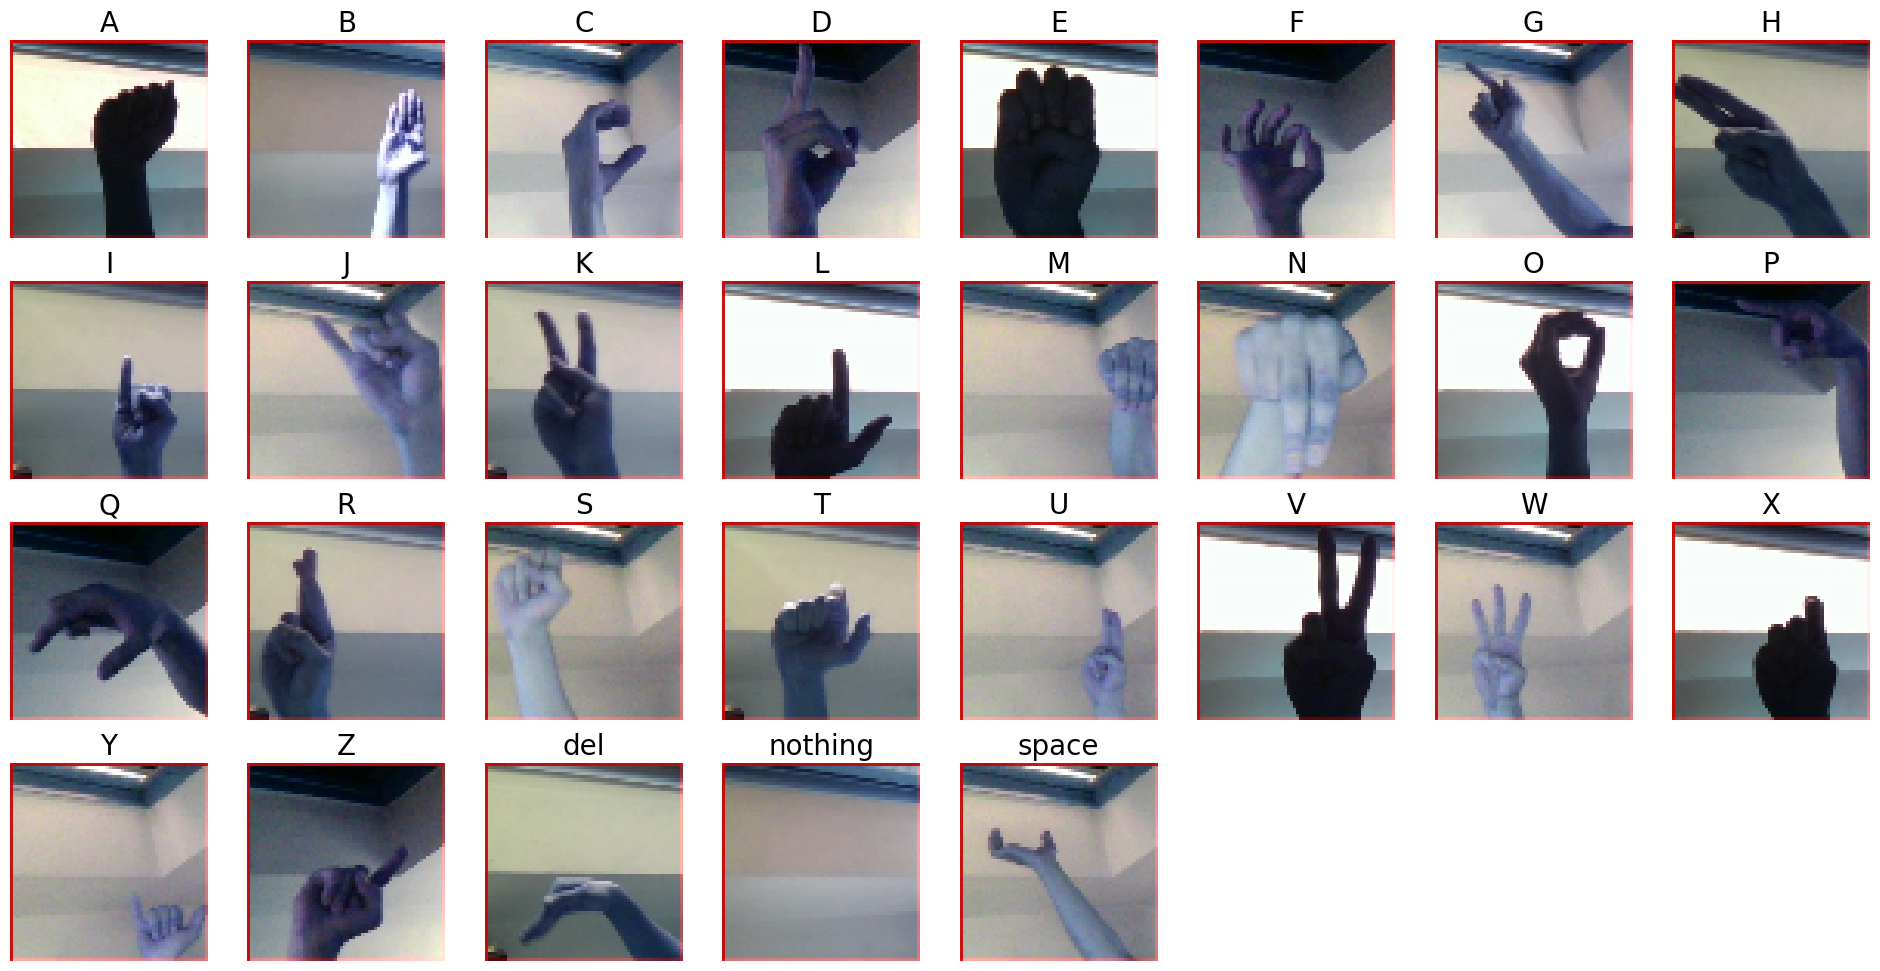

In [11]:
y_test_in = y_test.argsort()
y_test = y_test[y_test_in]
X_test = X_test[y_test_in]

print("Testing images: ")
print_images(image_list = X_test)

# **Навчання моделі**



In [12]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [13]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [14]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.layers import Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu',input_shape = (64, 64, 3)))
model.add(Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (4, 4)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 256 , kernel_size = 5, padding = 'same', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(29, activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       409728    
                                                      

In [15]:
my_model = Sequential()
my_model.add(Conv2D(64, kernel_size=4, strides=1, activation='relu', input_shape=(64, 64, 3)))
my_model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Conv2D(128, kernel_size=4, strides=1, activation='relu'))
my_model.add(Conv2D(128, kernel_size=4, strides=2, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Conv2D(256, kernel_size=4, strides=1, activation='relu'))
my_model.add(Conv2D(256, kernel_size=4, strides=2, activation='relu'))
my_model.add(Flatten())
my_model.add(Dropout(0.5))
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(29, activation='softmax'))

my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
my_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        3136      
                                                                 
 conv2d_6 (Conv2D)           (None, 29, 29, 64)        65600     
                                                                 
 dropout_3 (Dropout)         (None, 29, 29, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 128)       131200    
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 128)       262272    
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 128)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 9, 9, 256)       

In [16]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Нижня клітинка потребує 2 години часу для навчання

In [17]:
hist = model.fit(X_train, y_train, epochs = 5, batch_size = 64)



Train on 69600 samples
Epoch 1/5
69600/69600 [==============================] - 2267s 33ms/sample - loss: 1.5859 - acc: 0.5217
Epoch 2/5
69600/69600 [==============================] - 1736s 25ms/sample - loss: 0.2253 - acc: 0.9265
Epoch 3/5
69600/69600 [==============================] - 1607s 23ms/sample - loss: 0.1319 - acc: 0.9595
Epoch 4/5
69600/69600 [==============================] - 1594s 23ms/sample - loss: 0.1105 - acc: 0.9692
Epoch 5/5
69600/69600 [==============================] - 1595s 23ms/sample - loss: 0.0972 - acc: 0.9748


# **Зберігання моделі для збереження часу**

In [24]:
model.save('mymodel.h5')

c:\Users\sanya\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
saved_model = keras.models.load_model('./mymodel.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# **Демонстрація статистичних результатів**

In [26]:
score = saved_model.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

c:\Users\sanya\anaconda3\Lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Accuracy for test images: 99.707 %


In [19]:
def plot_confusion_matrix(y, y_pred):
    y = np.argmax(y, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (24, 20))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

c:\Users\sanya\anaconda3\Lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


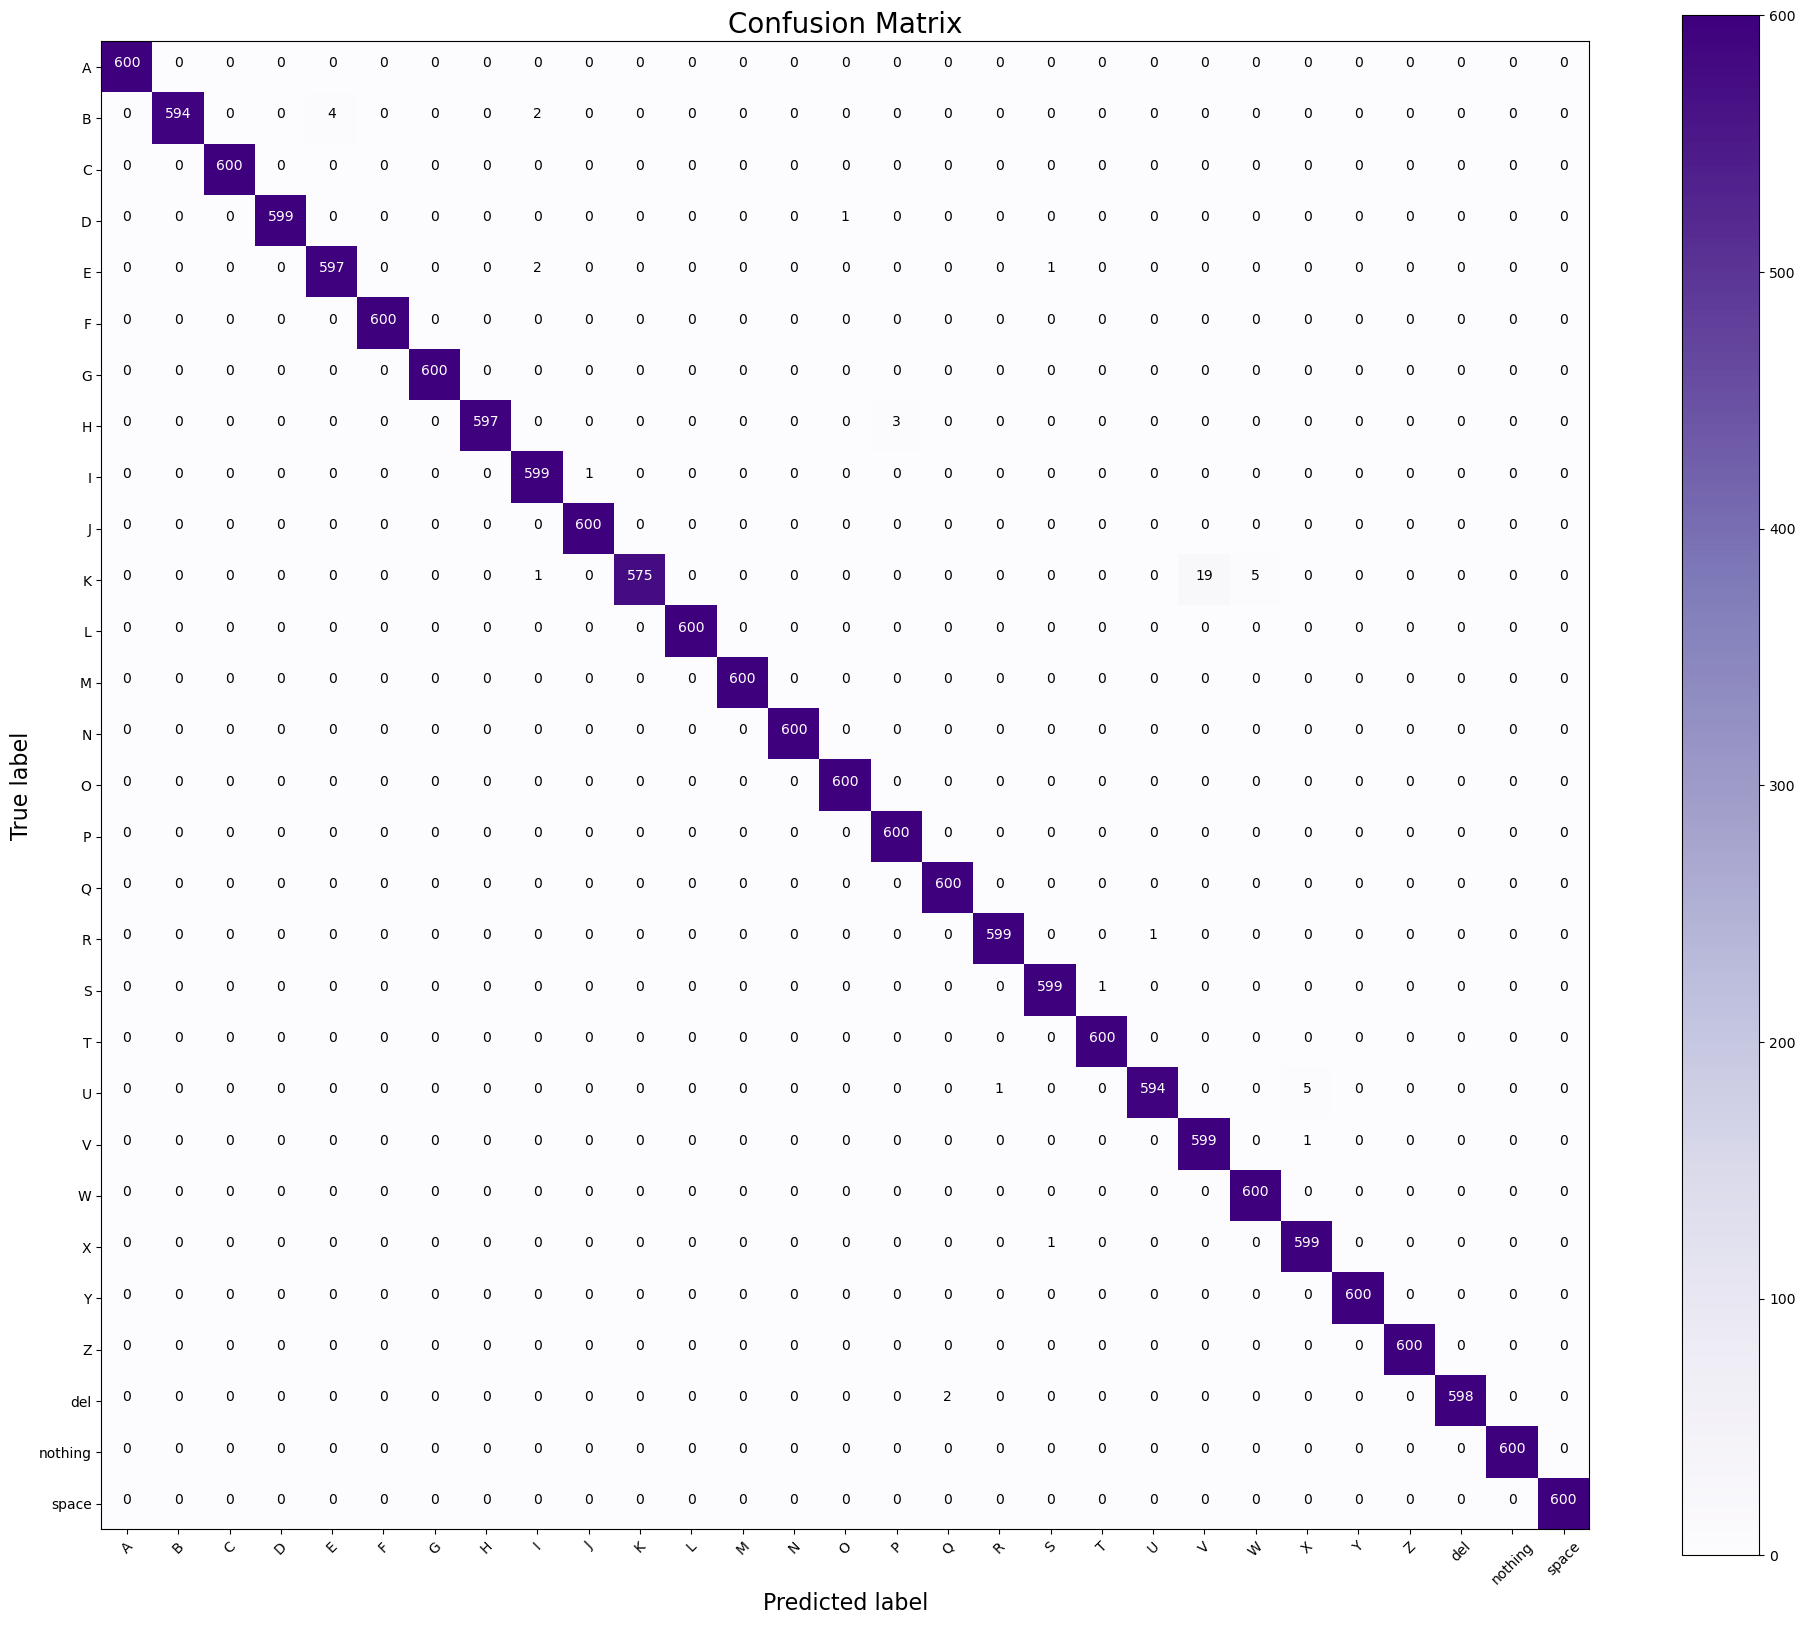

In [20]:
from sklearn.metrics import confusion_matrix
import itertools

y_test_pred = saved_model.predict(X_test, batch_size = 64, verbose = 0)
plot_confusion_matrix(y_test, y_test_pred)

# Тестування моделі в режимі реального часу

In [32]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [33]:
def mediapipe_detection(image, model):
    '''Detect the landmarks of the image using the mediapipe model'''
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [34]:
def draw_landmarks(image, results):
    '''Function to draw landmarks from the detected image'''
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [35]:
def draw_styled_landmarks(image, results):
    # Draw left hand connections  
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [36]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)
        print(results)

        draw_styled_landmarks(image, results)

        cv2.imshow('Gesture Detected', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [37]:
draw_landmarks(frame, results)

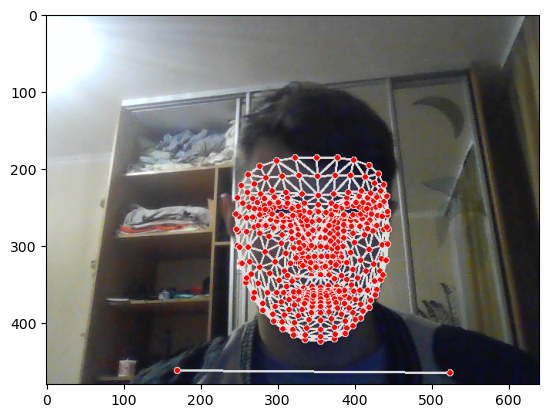

In [38]:

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [62]:
labels = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O',
          15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while True:
        isTrue, frame = cap.read()

        if not isTrue:
            break

        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks with styled connections
        draw_styled_landmarks(image, results)

        img = frame[:250, :250]
        img = cv2.resize(img, (64, 64,))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = np.array(img).reshape((1, 64, 64, 3))
        res = saved_model.predict(img)[0]
        print(res)
        n = np.argmax(res)
        print(res[n], labels[n])
        print(frame.shape)
        h, w, c = frame.shape
        cv2.rectangle(image, (0, 0), (250, 250), (225, 0, 255), 2)
        cv2.putText(image, labels[n], (w//2, h-20),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

        draw_styled_landmarks(image, results)
        cv2.imshow('OpenCV Feed', image)


        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0.]
1.0 nothing
(480, 640, 3)
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0.]
1.0 nothing
(480, 640, 3)
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0.]
1.0 nothing
(480, 640, 3)
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0.]
1.0 nothing
(480, 640, 3)
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0.]
1.0 nothing
(480, 640, 3)
<class 'mediapipe.python.solution_base.SolutionOutputs'>
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0